In [3]:
import pandas as pd

df = pd.read_pickle('dataset/total_df_rank_pattern.pkl')

AxesSubplot(0.125,0.125;0.62x0.755)

 Frequency_Net        target                -0.424826
target               Frequency_Net         -0.424826
B_ratio_Net          A_ratio_Net           -0.419103
A_ratio_Net          B_ratio_Net           -0.419103
신선식품_r_Net           가공식품_r_Net            -0.377578
                                              ...   
패션잡화_구매금액_r_abs      패션잡화_구매금액_r_abs        1.000000
패션잡화_구매금액_r_Net      패션잡화_구매금액_r_Net        1.000000
전문스포츠/레저_구매금액_r_abs  전문스포츠/레저_구매금액_r_abs    1.000000
일상용품_구매금액_r_abs      일상용품_구매금액_r_abs        1.000000
target               target                 1.000000
Length: 3844, dtype: float64 

dict_keys(['전문스포츠/레저_구매금액_r_abs', '전문스포츠/레저_r_abs', '패션잡화_구매금액_r_Net', '패션잡화_r_Net', '의류_구매금액_r_Net', '의류_r_Net', '가구/인테리어_구매금액_r_Net', '가구/인테리어_r_Net', '전문스포츠/레저_r_Net', '전문스포츠/레저_구매금액_r_Net', '교육/문화용품_구매금액_r_abs', '교육/문화용품_r_abs', '교육/문화용품_r_Net', '교육/문화용품_구매금액_r_Net', '기타_구매금액_r_abs', '기타_r_abs', '기타_r_Net', '기타_구매금액_r_Net', '디지털/가전_구매금액_r_abs

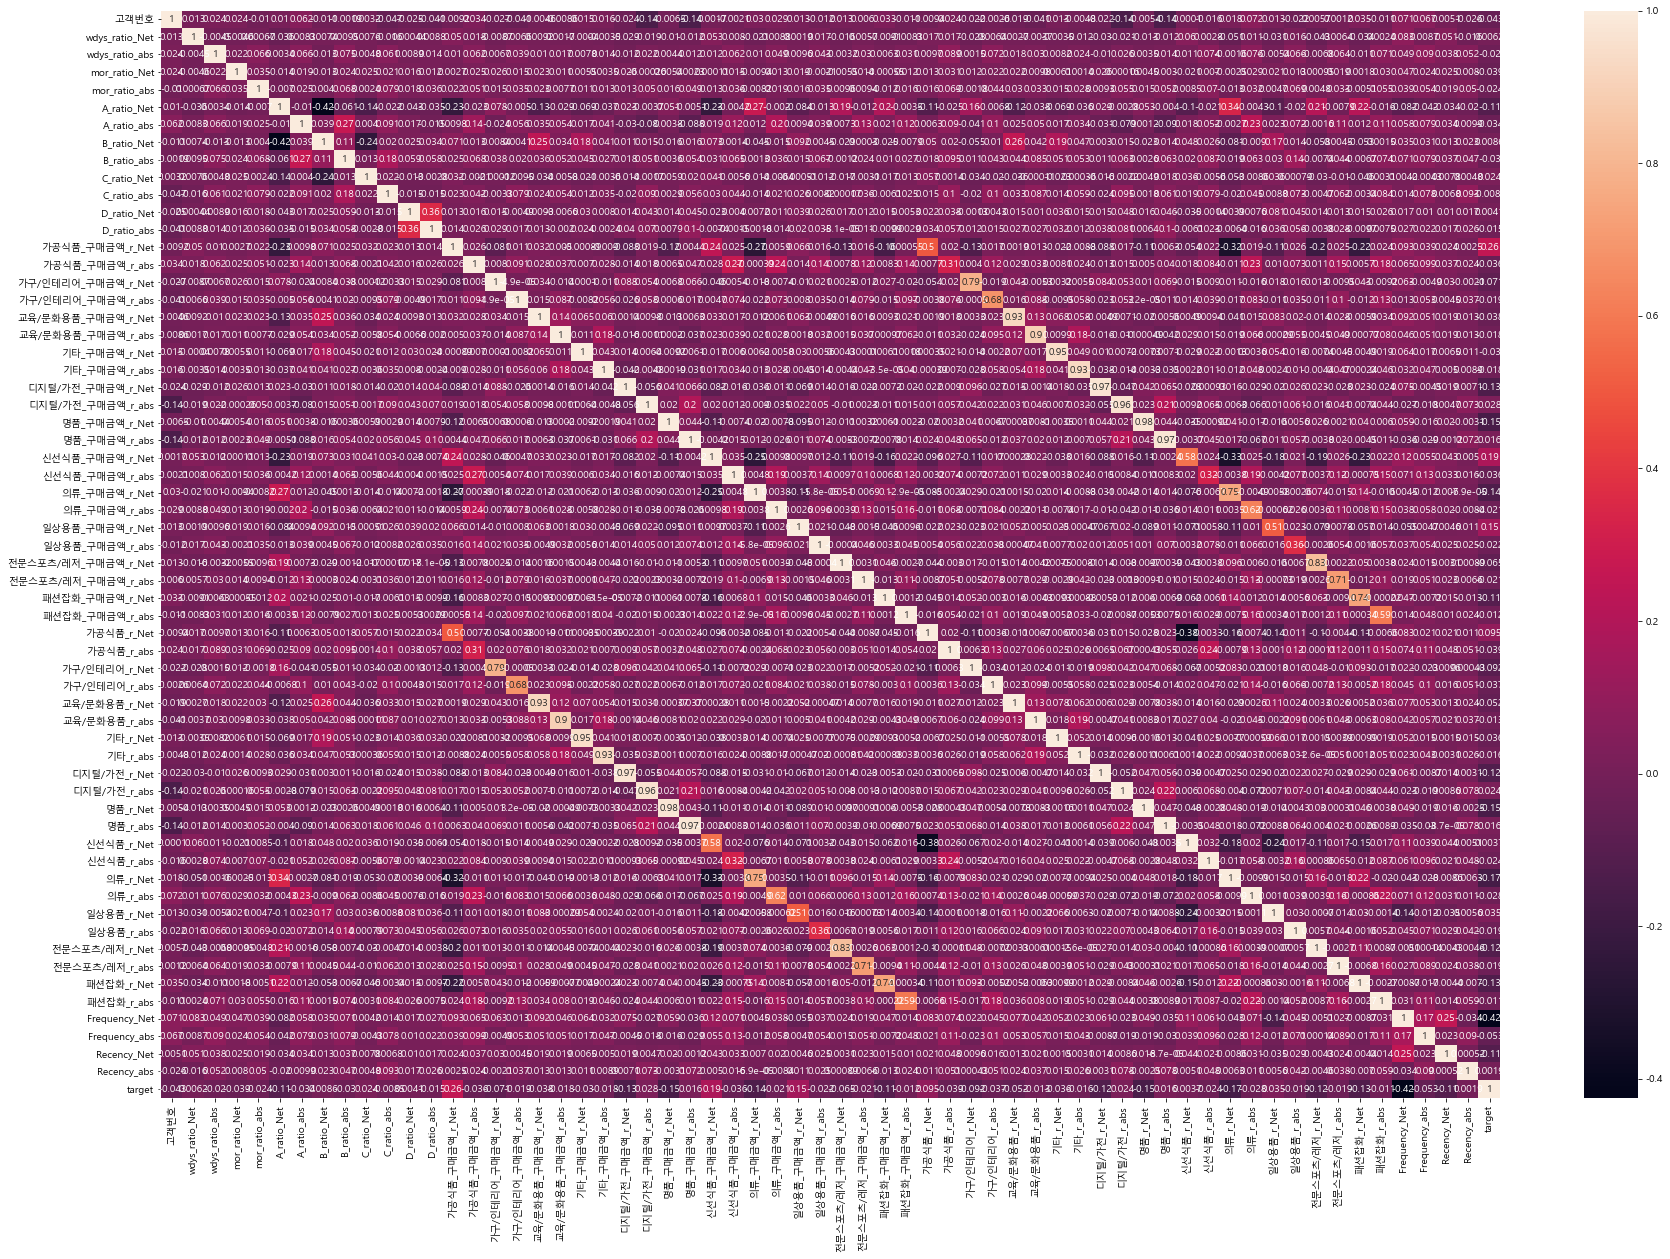

In [15]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    plt.figure(figsize=(30,20))
    print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    print(dict(cond).keys())
    
get_corr(df,0.69,1)

In [29]:
df

,고객번호,성별,연령대,거주지역,wdys_ratio_Net,wdys_ratio_abs,mor_ratio_Net,mor_ratio_abs,A_ratio_Net,A_ratio_abs,...,일상용품_r_abs,전문스포츠/레저_r_Net,전문스포츠/레저_r_abs,패션잡화_r_Net,패션잡화_r_abs,Frequency_Net,Frequency_abs,Recency_Net,Recency_abs,target
0,1,M,60세이상,서울 강남구,-1,3,0,2,-1,1,...,3,-1,13,-1,3,-1,1,-6,6,1
1,2,M,60세이상,경기 김포시,-1,7,0,4,-1,1,...,6,0,0,1,3,-3,3,-7,7,0
2,3,M,60세이상,서울 은평구,1,1,-2,2,0,0,...,1,0,0,0,0,-4,6,-3,3,1
3,4,F,60세이상,서울 노원구,3,3,0,4,0,2,...,5,-1,5,-1,3,-1,5,3,3,1
4,5,M,60세이상,경기 김포시,0,4,-1,9,0,0,...,0,-2,6,-5,5,-7,7,-7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,19356,F,40세~44세,경기 김포시,7,7,0,6,0,0,...,4,0,0,0,0,8,8,0,0,0
19081,19357,F,40세~44세,대전 유성구,-3,3,5,5,-1,1,...,3,2,6,4,4,9,9,2,2,0
19082,19359,M,50세~54세,경기 김포시,3,3,0,0,0,0,...,0,0,0,0,0,7,11,2,8,0
19083,19360,F,45세~49세,서울 강서구,-8,8,4,4,4,4,...,0,4,4,5,5,2,6,3,3,0


# 1. 대분류_r_abs와 = 대분류_구매금액_r_Net 관계가?

In [10]:
from sklearn.preprocessing import LabelEncoder

train_df = df.drop('고객번호',axis = 1)

encoder = LabelEncoder()


train_df['성별'] = encoder.fit_transform(train_df['성별'])
train_df['연령대'] = encoder.fit_transform(train_df['연령대'])
train_df['거주지역'] = encoder.fit_transform(train_df['거주지역'])

train_df.head(3)

,성별,연령대,거주지역,wdys_ratio_Net,wdys_ratio_abs,mor_ratio_Net,mor_ratio_abs,A_ratio_Net,A_ratio_abs,B_ratio_Net,...,일상용품_r_abs,전문스포츠/레저_r_Net,전문스포츠/레저_r_abs,패션잡화_r_Net,패션잡화_r_abs,Frequency_Net,Frequency_abs,Recency_Net,Recency_abs,target
0,1,9,8,-1,3,0,2,-1,1,2,...,3,-1,13,-1,3,-1,1,-6,6,1
1,1,9,1,-1,7,0,4,-1,1,2,...,6,0,0,1,3,-3,3,-7,7,0
2,1,9,29,1,1,-2,2,0,0,0,...,1,0,0,0,0,-4,6,-3,3,1


In [11]:
from sklearn.model_selection import train_test_split

X = train_df.drop('target',axis=1)
y = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X_train, y_train)
predict = lr.predict(X_test)
accuracy_score(y_test, predict)

C:\anaconda3\envs\cakd3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7636887608069164

In [21]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

lgbm_clf.fit(X_train,y_train, early_stopping_rounds = 200, eval_set=[(X_test,y_test)], eval_metric = 'logloss',
                                                                   verbose=False)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬:\n', confusion)
    print('정확도:{:.4f}, 정밀도:{:.4f}, 재현율:{:.4f}, f1:{:.4f}, auc:{:.4f}'
         .format(accuracy, precision, recall, f1, roc_auc))

In [25]:
get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)

오차행렬:
 [[1512  453]
 [ 429 1423]]
정확도:0.7689, 정밀도:0.7585, 재현율:0.7684, f1:0.7634, auc:0.8557
